In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

from scipy.stats import wilcoxon

In [2]:
#import stat results
stat_results = {}

for filtered in ['exclusion_filtered']: 
    stat_results[filtered] = {}
    for correction in ['uncorrected','GC_corrected']:
        stat_results[filtered][correction] = pd.read_csv('files/'+filtered+'.'+correction+'.tsv', sep='\t')


central_coverage 351 0.931
central_coverage wilcox_stat 1421.0 pval 1.0443149804412935e-58


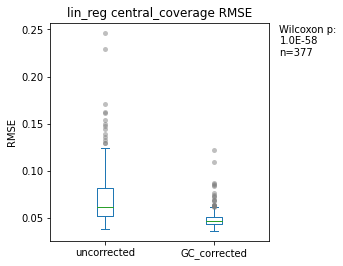

mean_coverage 325 0.8621
mean_coverage wilcox_stat 2347.0 pval 1.1418202550522672e-55


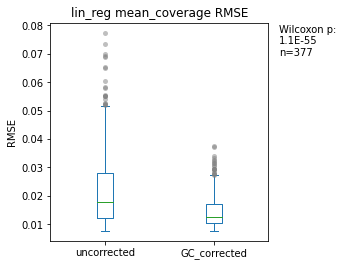

amplitude 32 0.0849
amplitude wilcox_stat 1684.0 pval 7.767966114174711e-58


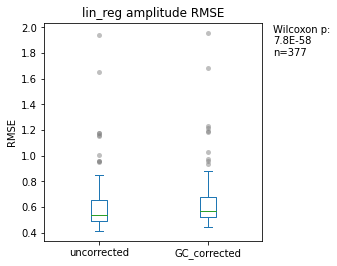

In [3]:
filtered = 'exclusion_filtered'
#make boxplots and run wilcoxon tests
for feature_type in ['central_coverage','mean_coverage','amplitude']:
    boxplot_data = pd.DataFrame()
    for correction in ['uncorrected','GC_corrected']:
        current_data = stat_results[filtered][correction]['lin-reg-RMSE_'+feature_type].copy()
        current_data.name = correction
        current_data['filter'] = filtered
        current_data['correction'] = correction
        boxplot_data = boxplot_data.append(current_data)

    fig,ax = plt.subplots(1, figsize=(5,3.8))
    ax.set_title('lin_reg '+feature_type+' RMSE')
    ax.set_ylabel('RMSE')

    boxplot_data.drop(columns = (['filter','correction'])).T.plot.box(ax = ax, flierprops = {'marker':'.','markersize':10,'alpha':.5,'markerfacecolor':'grey','markeredgecolor':'none'})
    
    a = stat_results[filtered]['uncorrected']['lin-reg-RMSE_'+feature_type]
    b = stat_results[filtered]['GC_corrected']['lin-reg-RMSE_'+feature_type]
    print(feature_type,sum(a>b),np.round(sum(a>b)/len(a),4))
    stat,wilcoxon_pval = wilcoxon(a,b)
    print(feature_type,'wilcox_stat',stat,'pval',wilcoxon_pval)
    ax.text(1.05,.85, 'Wilcoxon p:\n'+'{:.1E}'.format(wilcoxon_pval)+'\nn='+str(len(stat_results[filtered][correction])), transform=ax.transAxes)

    ax.set_aspect(1.0/ax.get_data_ratio(), adjustable='box')
    fig.tight_layout()
    fig.savefig('plots/'+feature_type+'_MBC_RMSE_plot.pdf')
    plt.show()
